McClarren #21.1:

Consider a beam of neutrons striking a slab of thickness 5 cm and Σ t = 1.0 cm−1. Compute the transmission fraction and time how long the calculation takes using N = 10 6 neutrons and several different scattering ratios: 0, 0.1, 0.5, 0.9, 1.0. Compare your computed transmission fractions as a function of scattering ratio to the expected trend as the scattering is increased.

In [8]:
import numpy as np
import time

def monte_carlo_transmission(N, d, Σ_t, r):
    absorbed = 0
    transmitted = 0

    for _ in range(N):
        position = 0

        while position < d:
        #Sample distance to next interaction
            step = np.random.exponential(1 / Σ_t)
            position += step

            if position >= d:
                transmitted += 1
                break

            if np.random.rand() > r:
                absorbed += 1
                break

    return transmitted / N

#Parameters
d = 5 #cm
Σ_t = 1.0 #cm^-1
N = 10**6 #Number of neutrons
scattering_ratios = [0, 0.1, 0.5, 0.9, 1]

results = []

#Compute caclulation time
start_time = time.time()

for r in scattering_ratios:
    transmission_fraction = monte_carlo_transmission(N, d, Σ_t, r)
    results.append((r, transmission_fraction))

end_time = time.time()
calculation_time = end_time - start_time

#Results
for r, fraction in results:
    print(f"Scattering ratio: {r}, Transmission fraction: {fraction}")

print(f"(Total calculation time: {calculation_time:.2f} seconds")

Scattering ratio: 0, Transmission fraction: 0.00663
Scattering ratio: 0.1, Transmission fraction: 0.011199
Scattering ratio: 0.5, Transmission fraction: 0.081955
Scattering ratio: 0.9, Transmission fraction: 0.606897
Scattering ratio: 1, Transmission fraction: 1.0
(Total calculation time: 35.39 seconds


McClarren #21.2:

Modify the shielding code to consider neutrons of a single energy impinging on the shield and to tally the energy of the absorbed neutrons. Assume the neutrons are all 2.5 MeV and are produced from the fusion of deuterium. Plot the distribution of transmitted and absorbed neutrons with a large enough number of sampled neutrons.

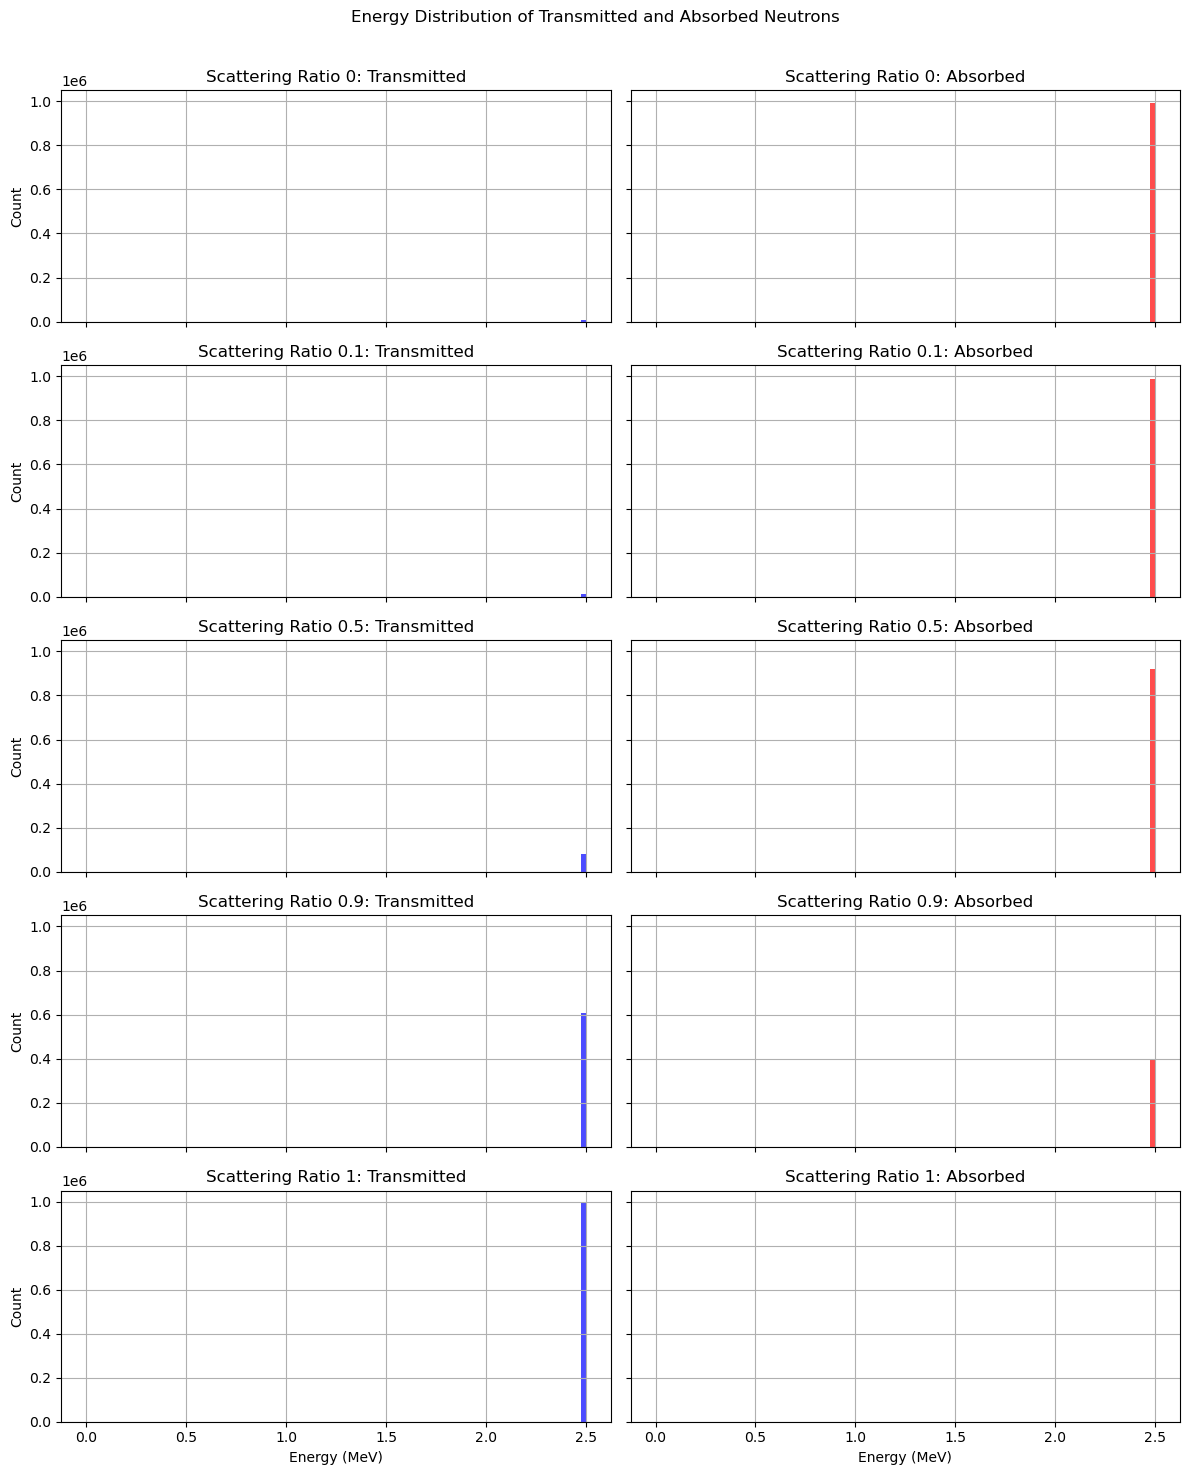

Total calculation time:  35.18 seconds


In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

def monte_carlo_transmission_energy(N, d, Σ_t, r, initial_energy):
    absorbed_energies = []
    transmitted_energies = []

    for _ in range(N):
        position = 0
        energy = initial_energy

        while position < d:
        #Sample distance to next interaction
            step = np.random.exponential(1 / Σ_t)
            position += step

            if position >= d:
                transmitted_energies.append(energy)
                break

            if np.random.rand() > r:
                absorbed_energies.append(energy)
                break

    return transmitted_energies, absorbed_energies

#Parameters
d = 5 #cm
Σ_t = 1.0 #cm^-1
N = 10**6 #Number of neutrons
scattering_ratios = [0, 0.1, 0.5, 0.9, 1]
initial_energy = 2.5 #MeV

results = {}

#Compute caclulation time
start_time = time.time()

for r in scattering_ratios:
    transmitted_energies, absorbed_energies = monte_carlo_transmission_energy(N, d, Σ_t, r, initial_energy)
    results[r] = (transmitted_energies, absorbed_energies)

end_time = time.time()
calculation_time = end_time - start_time

#Plot results
fig, axes = plt.subplots(len(scattering_ratios), 2, figsize=(12,15), sharex=True, sharey=True)
fig.suptitle('Energy Distribution of Transmitted and Absorbed Neutrons')

for i,r in enumerate(scattering_ratios):
    transmitted_energies, absorbed_energies = results[r]

    axes[i, 0].hist(transmitted_energies, bins=100, range=(0, initial_energy), color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Scattering Ratio {r}: Transmitted')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].grid(True)

    axes[i, 1].hist(absorbed_energies, bins=100, range=(0, initial_energy), color='red', alpha=0.7)
    axes[i, 1].set_title(f'Scattering Ratio {r}: Absorbed')
    axes[i, 1].grid(True)

axes[-1, 0].set_xlabel('Energy (MeV)')
axes[-1, 1].set_xlabel('Energy (MeV)')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print(f"Total calculation time: {calculation_time: .2f} seconds")

McClarren Chapter 21 PP #2:

In this exercise you will demonstrate the standard deviation of the estimates decays as N−1/2. Solve the problem of a beam striking an absorbing slab, Σt = Σa = 1.0 cm−1, with thickness 3 cm. Solve this problem with N = 10 2, 10 3, 10 4, 10 5, 10 6. At each value of N estimate the solution 10 times, and take the standard deviation of the estimates. Plot the standard deviation as a function of N on a log-log scale. Compare your results to the expected trend.

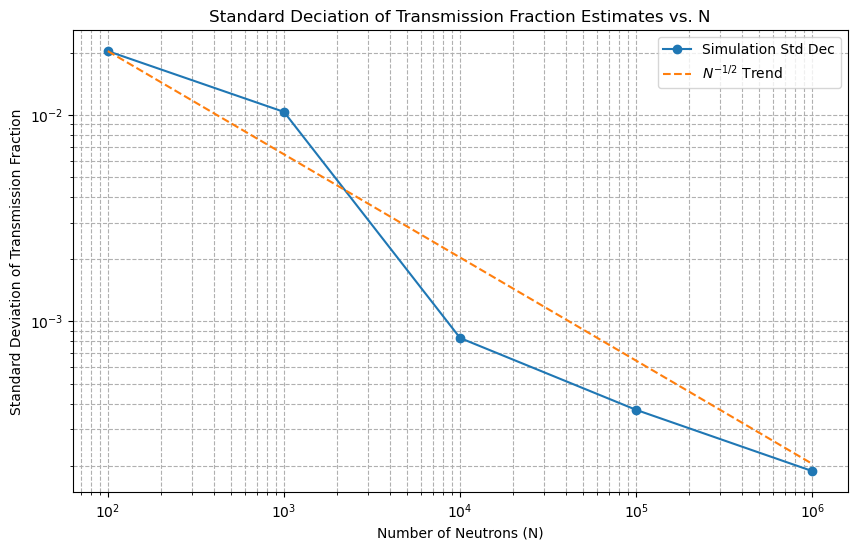

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_transmission(N, d, Σ_t):
    transmitted = 0

    for _ in range(N):
        position = 0

        while position < d:
            #Sample distance to next interaction
            step = np.random.exponential(1 / Σ_t)
            position += step

            if position >= d:
                transmitted += 1
                break

            break

    return transmitted / N

#Parameters
d = 3 #cm
Σ_t = 1.0 #cm^-1
N_values = [10**2, 10**3, 10**4, 10**5, 10**6]
num_estimates = 10

std_devs = []

for N in N_values:
    estimates = []
    for _ in range(num_estimates):
        transmission_fraction = monte_carlo_transmission(N, d, Σ_t)
        estimates.append(transmission_fraction)

    std_devs.append(np.std(estimates))

#Plot
plt.figure(figsize=(10,6))
plt.loglog(N_values, std_devs, 'o-', label='Simulation Std Dec')
plt.loglog(N_values, [std_devs[0] * (N_values[0]/N)**0.5 for N in N_values], '--', label='$N^{-1/2}$ Trend')
plt.xlabel('Number of Neutrons (N)')
plt.ylabel('Standard Deviation of Transmission Fraction')
plt.title('Standard Deviation of Transmission Fraction Estimates vs. N')
plt.legend()
plt.grid(True, which="both", ls='--')
plt.show()

McClarren Chapter 22 PP #1:

Modify the iron shielding code to include implicit capture. Compare the analog to the implicit capture results with N = 10^2, 10^3, 10^4, and 10^5. Compute the figure of merit for the average transmitted energy per neutron for these values of N.

In [ ]:
import numpy as np
import random
import math
import time
import csv
import os

print("New Working Directory:", os.getcwd()) 

lead_s = [] #create a blank list for the x-sects
lead_s_energy = [] #create a blank list for the x-sects energies
#this loop will only execute if the file opens
with open("pb_scat.csv") as csvfile:
    pbScat = csv.reader(csvfile)
    for row in pbScat: #have for loop that loops over each line
        lead_s.append(float(row[1]))
        lead_s_energy.append(float(row[0]))
    lead_scattering = np.array([lead_s_energy,lead_s])
    lead_abs = [] #create a blank list for the x-sects
    lead_abs_energy = [] #create a blank list for the x-sects energies
    #this loop will only execute if the file opens

with open("pb_radcap.csv") as csvfile:
    pbAbs = csv.reader(csvfile)
    for row in pbAbs: #have for loop that loops over each line
        lead_abs.append(float(row[1]))
        lead_abs_energy.append(float(row[0]))
    lead_absorption = np.array([lead_abs_energy,lead_abs])

def energy_lookup(data_set, inp_energy):
    idx = np.searchsorted(data_set, inp_energy)
    if idx >= len(data_set): return len(data_set) - 1
    if idx == 0: return 0
    diff_curr = abs(data_set[idx] - inp_energy)
    diff_prev = abs(data_set[idx-1] - inp_energy)
    if diff_prev < diff_curr: return idx - 1
    return idx

def expfiss(E):
    return np.exp(-E / 2.0)

def slab_reactor(sig_s, sig_a, thickness, density, A, N, isotropic=False, implicit=False):
    alpha = (A - 1.0)**2 / (A + 1.0)**2
    Sig_s = sig_s.copy()
    Sig_a = sig_a.copy()
    
    Sig_s[1, :] = (density * 1e-24) * Sig_s[1, :]
    Sig_a[1, :] = (density * 1e-24) * Sig_a[1, :]

    s_energies = Sig_s[0, :]
    a_energies = Sig_a[0, :]

    min_eng = np.min([s_energies[0], a_energies[0]])
    max_eng = np.max([s_energies[-1], a_energies[-1]])
    max_prob = np.max(expfiss(Sig_a[0, :]))
    
    transmission = []
    
    N = int(N)
    
    for i in range(N):
        mu = random.uniform(-1, 1) if isotropic else 1.0

        #Source Generation
        while True:
            x = random.uniform(min_eng, max_eng)
            y = random.uniform(0, max_prob)
            rel_prob = expfiss(x)
            if y <= rel_prob:
                energy = x
                break

        pos = 0
        weight = 1.0
        
        #Particle Transport Loop
        while True:
            scat_index = energy_lookup(s_energies, energy)
            abs_index = energy_lookup(a_energies, energy)
            
            cur_scat = Sig_s[1, scat_index]
            cur_abs = Sig_a[1, abs_index]
            Sig_t = cur_scat + cur_abs

            if Sig_t == 0: break

            l = -math.log(1 - random.random()) / Sig_t
            pos += l * mu

            if pos > thickness:
                transmission.append(weight * energy)
                break
            elif pos < 0:
                break
            
            #Collision Logic
            if implicit:
                #Implicit Capture
                weight *= (cur_scat / Sig_t)
                

                if weight < 1e-3:
                    if random.random() < 0.1:
                        weight *= 10 # Survive
                    else:
                        break # Die
                
                mu = random.uniform(-1, 1)
                energy = random.uniform(alpha * energy, energy)
                
            else:
                #Analog Capture
                if random.random() < cur_scat / Sig_t:
                    mu = random.uniform(-1, 1)
                    energy = random.uniform(alpha * energy, energy)
                else:
                    break

    return transmission

def compute_stats_corrected(transmitted_vals, N_total):
    if N_total == 0: return 0, 0
    
    sum_x = np.sum(transmitted_vals)
    sum_x2 = np.sum(np.array(transmitted_vals)**2)
    
    #Mean over all source particles
    mean = sum_x / N_total
    
    #Population Variance
    population_var = (sum_x2 / N_total) - (mean**2)
    
    #Variance of the Mean (Standard Error Squared)
    var_of_mean = population_var / N_total
    
    return mean, var_of_mean

#Main Execution

Ns = [10, 100]
#Density: atoms/cm^3
density_input = (11.34 / 208) * 6.022e23 
thickness = 150

print(f"{'N':<10} | {'Method':<10} | {'Avg E/N':<12} | {'FOM':<10} | {'Time (s)':<10}")
print("-" * 65)
for N in Ns:
    #Analog
    t0 = time.time()
    trans_a = slab_reactor(lead_scattering, lead_absorption, thickness, density_input, 208, N, isotropic=True, implicit=False)
    T_analog = time.time() - t0
    
    avg_a, var_mean_a = compute_stats_corrected(trans_a, N)
    fom_a = 1.0 / (var_mean_a * T_analog) if (var_mean_a > 0 and T_analog > 0) else 0

    print(f"{N:<10} | {'Analog':<10} | {avg_a:.4e}   | {fom_a:.4e} | {T_analog:.4f}")

    #Implicit
    t1 = time.time()
    trans_i = slab_reactor(lead_scattering, lead_absorption, thickness, density_input, 208, N, isotropic=True, implicit=True)
    T_implicit = time.time() - t1
    
    avg_i, var_mean_i = compute_stats_corrected(trans_i, N)
    fom_i = 1.0 / (var_mean_i * T_implicit) if (var_mean_i > 0 and T_implicit > 0) else 0

    print(f"{N:<10} | {'Implicit':<10} | {avg_i:.4e}   | {fom_i:.4e} | {T_implicit:.4f}")
    print("-" * 65)

Lead is a much heavier nucleus than iron so the energy loss in collisions is much less. In addition, lead has a higher absorption cross section in the thermal region.